# A box model in python

For advice on getting started with the Jupyter notebook, take a look at 

http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Running%20Code.html

(basically press shift+enter)

## initial module imports

In [2]:
import numpy as np
import pylab as plt
from scipy.integrate import odeint

## display graphics inline

In [3]:
%matplotlib inline 

## initial conditions

In [ ]:
M = 2.5e19
O2 = 0.2*M

# rate constants
J1 = 1e-2
k2 = 6e-34*M*O2 
k3 = 1e-11

# initial conditions for species
C0 = [5e11, 0e11, 1e12, 1e3] 

# times at which solution is desired:
times = np.linspace(0, 1, 10000)

## kinetic equations

In [17]:
def kinetic_equations(state, t):
    NO2, NO, O3, O = state
    
    dNO2 = -J1*NO2 +k3*NO*O3 
    dNO = J1*NO2 - k3*O3*NO 
    dO3 = k2*O - k3*NO*O3 
    dO = J1*NO2 - k2*O
    
    return [dNO2, dNO, dO3, dO]

## solve the equations

In [ ]:
NO2, NO, O3, O = odeint(kinetic_equations, C0, times).T

## plot the results

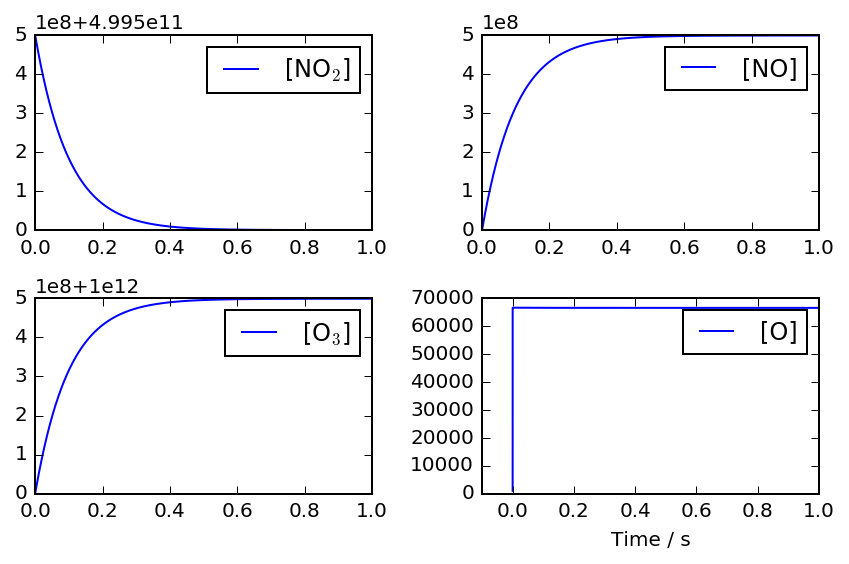

In [19]:
# plot results
plt.subplot(2,2,1)
plt.plot(times, NO2, label = '[NO$_2$]')
plt.legend()

plt.subplot(2,2,2)
plt.plot(times, NO, label = '[NO]')
plt.legend()

plt.subplot(2,2,3)
plt.plot(times, O3, label = '[O$_3$]')
plt.legend()

plt.subplot(2,2,4)
plt.xlim([-0.1,1])
plt.xlabel('Time / s')
plt.plot(times, O, label = '[O]')
plt.legend()

plt.tight_layout()
plt.show()